# BMME890 - Fall 2019

## Wine Quality Project

Group: Nhan Pham, Khoi Huynh, Frank Wang, and Jiayi Xu

## Problem Overview

- Two datasets of red and white wine.
- Predict the quality of the red and white wine (score from 0 to 10)

## Dataset

- From UCI repository: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
- Size: 4898 samples, 12 features
- Features: 
    - `fixed acidity`
    - `volatile acidity`
    - `citric acid`
    - `residual sugar`
    - `chlorides`
    - `free sulfur dioxide`
    - `total sulfur dioxide`
    - `density`
    - `pH`
    - `sulphates`
    - `alcohol`

## Approach

The problem can be viewed in 2 ways:
- Classification
- Regression

### Classification

- Multilabel classification problem
- Labels: $3 - 9$
- Methods: random forest, SVM

### Regression

- Perform usual regression techniques
- Round the output to its nearest integer
- Methods: linear regression, ridge regression, lasso

In [218]:
import numpy as np
import pandas as pd
import matplotlib 
import seaborn as sns
from matplotlib import pyplot as plt

In [219]:
# read red and white dataset and merge them
white_data=pd.read_csv('winequality-white.csv')
red_data=pd.read_csv('winequality-red.csv')

white_data_added=white_data
white_data_added['type']='white'

red_data_added=red_data
red_data_added['type']='red'

frames=[white_data_added, red_data_added]
dataset=pd.concat(frames, ignore_index=True)

dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,white


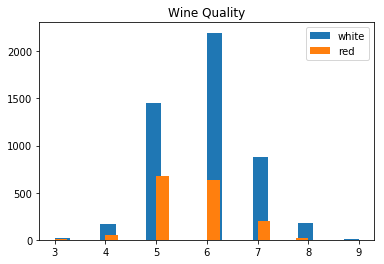

In [220]:
f,ax = plt.subplots(1,1)
ax.hist(dataset[dataset.type=='white'].quality, bins = 20)
ax.hist(dataset[dataset.type=='red'].quality, bins = 20)
ax.legend(['white','red'])
ax.set_title('Wine Quality')
plt.show()

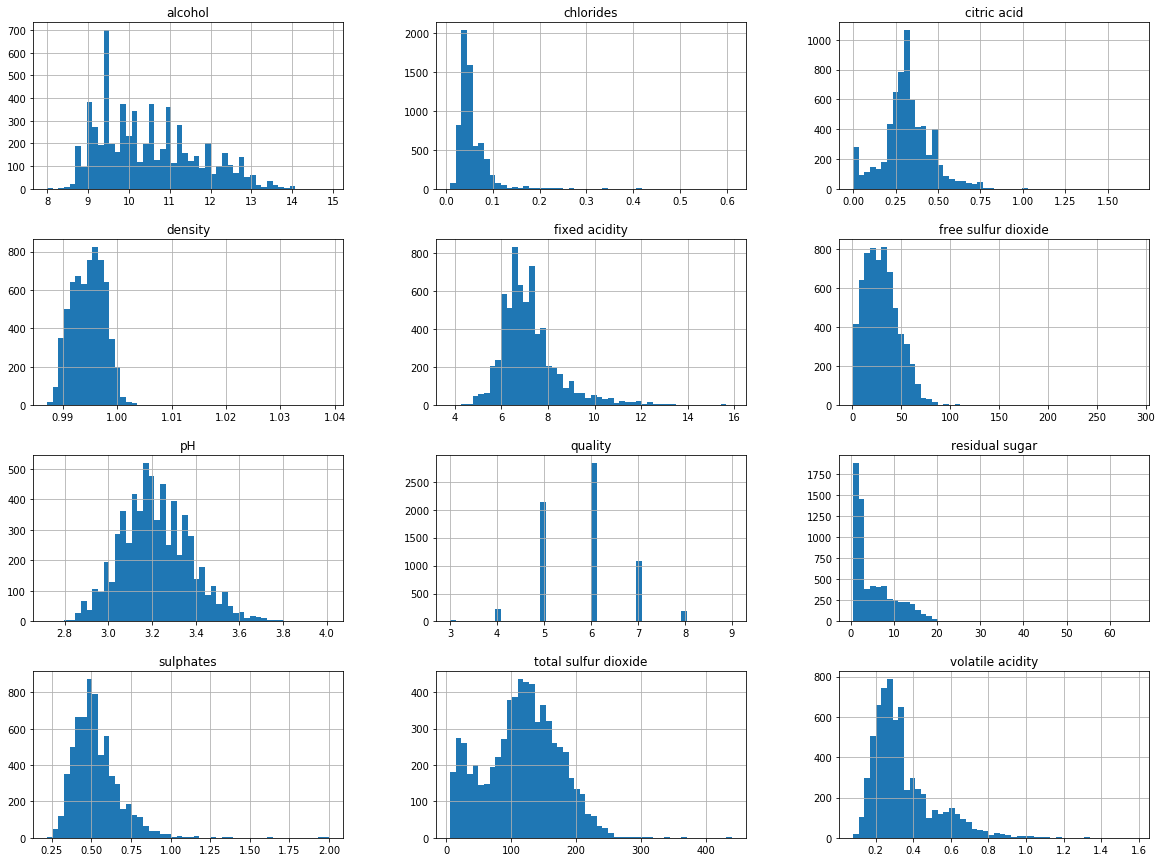

In [221]:
# histogram
dataset.hist(bins=50, figsize=(20,15))
plt.show()

In [222]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [223]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

## Note:

- The data look clean, no capped value, no missing values.
- Samples are in range $[3,9]$.

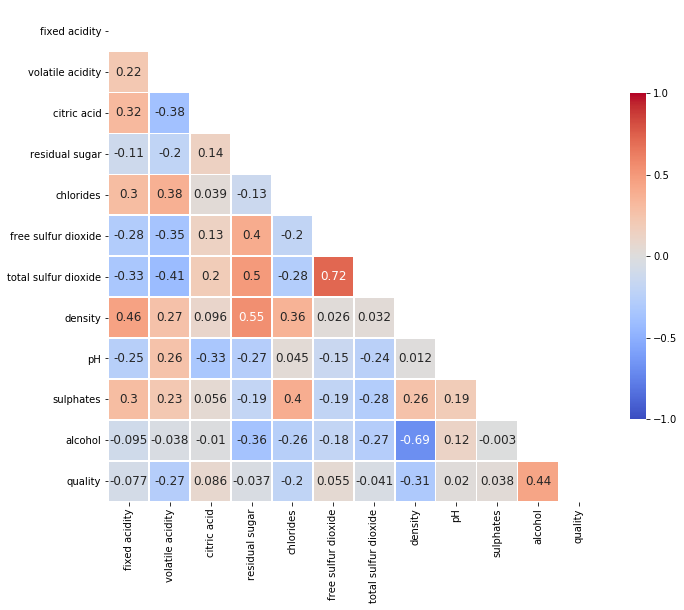

In [224]:
f, ax = plt.subplots(figsize=(11, 15)) 
corr_matrix = dataset.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(corr_matrix, mask = mask, square = True, linewidths = .5, cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

## Imbalanced label classes

In [225]:
dataset['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [226]:
# split into features and labels
dataset_y=dataset['quality']
dataset_x=dataset
dataset_x.drop(['quality'],axis=1,inplace=True)

In [227]:


cat_feats = dataset.dtypes[dataset.dtypes == "object"].index
num_feats = dataset.dtypes[dataset.dtypes != "object"].index

#dataset_x_withonehot = pd.get_dummies(dataset_x)
#dataset_x_withonehot.head()

In [228]:
def AccWithTol(model,tol,X,y):
    y_pred=model.predict(X)
    accuracy = (np.abs(y_pred - y) < tol )
    np.mean(accuracy)
    dict={'Label':y_test,'Pred':y_pred,'T/F':accuracy}
    a=pd.DataFrame(dict)
    val_cnt = a.Label.value_counts().sort_index()
    val_cnt = val_cnt.to_numpy()
    correct_cnt = []
    acc = []
    for i in range(3,9):
        sub_class = a[a.Label==i]
        correct_cnt.append(np.sum(sub_class['T/F']))
        acc.append(correct_cnt[-1] / val_cnt[i-3])
    new_dict = {'label': np.arange(3,9),'total_cnt': val_cnt,'correct_cnt': correct_cnt, 'acc': acc}
    new_df = pd.DataFrame(new_dict)
    return new_df

## Train-test split

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=42)

In [230]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error



In [231]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))

def rmsle_cv(model, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf,error_score=np.nan))
    return(rmse)

In [232]:
X_train_num=X_train[num_feats]
X_train_cat=pd.get_dummies(X_train[cat_feats])
X_test_num=X_test[num_feats]
X_test_cat=pd.get_dummies(X_test[cat_feats])
X_train_num

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1916,6.6,0.25,0.36,8.1,0.045,54.0,180.0,0.99580,3.08,0.42,9.2
947,8.5,0.16,0.35,1.6,0.039,24.0,147.0,0.99350,2.96,0.36,10.0
877,6.0,0.28,0.34,1.6,0.119,33.0,104.0,0.99210,3.19,0.38,10.2
2927,7.0,0.31,0.31,9.1,0.036,45.0,140.0,0.99216,2.98,0.31,12.0
6063,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4
...,...,...,...,...,...,...,...,...,...,...,...
3772,6.3,0.24,0.29,13.7,0.035,53.0,134.0,0.99567,3.17,0.38,10.6
5191,6.9,0.36,0.25,2.4,0.098,5.0,16.0,0.99640,3.41,0.60,10.1
5226,13.4,0.27,0.62,2.6,0.082,6.0,21.0,1.00020,3.16,0.67,9.7
5390,8.9,0.40,0.51,2.6,0.052,13.0,27.0,0.99500,3.32,0.90,13.4


In [233]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_num=pd.DataFrame(StandardScaler().fit_transform(X_train_num), columns=X_train_num.columns, index=X_train_num.index)
X_test_num=pd.DataFrame(StandardScaler().fit_transform(X_test_num), columns=X_test_num.columns, index=X_test_num.index)

In [234]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(X_train_num)
X_train_num_PCA = pd.DataFrame(data = principalComponents)
X_test_num_PCA = pca.transform(X_test_num)
X_test_num_PCA = pd.DataFrame(X_test_num_PCA,columns=X_train_num_PCA.dtypes[X_train_num_PCA.dtypes != "object"].index)

X_train_num_PCA



,0,1,2,3,4,5,6,7,8
0,2.273595,0.836452,-0.258257,-0.178699,-0.619095,-0.140198,-0.007151,-0.389141,-0.118683
1,0.945515,-0.141223,1.644118,-1.305055,-0.728053,-0.548436,0.331401,-1.019773,0.143509
2,-0.069007,-0.581869,-0.026548,0.099905,-2.045986,-1.189057,-0.421147,0.843758,0.411842
3,1.767940,-1.035531,0.707022,-1.239484,-0.436760,1.168680,-0.411407,0.608691,0.443874
4,-5.079340,4.684222,1.595684,3.317533,-5.420025,-0.694096,0.812491,3.713397,1.207631
...,...,...,...,...,...,...,...,...,...
5192,2.188569,0.171592,-0.686346,-0.504750,0.494606,0.387022,-0.114203,0.656990,0.715469
5193,-2.493578,0.125489,-0.662374,0.115538,0.173375,-1.382368,0.346650,0.611740,0.442051
5194,-2.722770,3.319330,3.597451,-0.371197,1.287809,-0.705690,-0.609235,-1.364705,1.018761
5195,-2.726035,-0.466509,2.104016,1.561012,1.762672,1.214215,-0.060257,0.561441,-0.028920


In [235]:
X_train=pd.concat([X_train_num_PCA,X_train_cat.reset_index()],axis=1)
X_test=pd.concat([X_test_num_PCA,X_test_cat.reset_index()],axis=1)
y_train=y_train.reset_index()
y_test=y_test.reset_index()

In [236]:
X_train=X_train.drop(columns='index')
X_test=X_test.drop(columns='index')
y_train=y_train['quality']
y_test=y_test['quality']





### LASSO

In [239]:
lasso = make_pipeline(
                RobustScaler(),
                Lasso(alpha =0.0005, random_state=1)
            )
score = rmsle_cv(lasso)
print("\nLasso score: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
lasso.fit(X_train,y_train)
lasso_acc = AccWithTol(lasso,1,X_test,y_test)
lasso_acc


Lasso score: mean 0.7474 std (0.0095)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,7,0.152174
2,5,420,390,0.928571
3,6,579,571,0.986183
4,7,221,168,0.760181
5,8,32,0,0.000000


In [240]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint


param_grids = {
        'lasso__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
    }
grid_search = GridSearchCV(estimator = lasso,
                           param_grid=param_grids,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
grid_search.best_estimator_.fit(X_train,y_train)
lasso_grid_acc = AccWithTol(grid_search.best_estimator_,1,X_test,y_test)
lasso_grid_acc

{'lasso__alpha': 0.0001}


,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,7,0.152174
2,5,420,390,0.928571
3,6,579,571,0.986183
4,7,221,168,0.760181
5,8,32,0,0.000000


### Elastic Net

In [241]:
ENet = make_pipeline(
            RobustScaler(), 
            ElasticNet(alpha=0.0005, l1_ratio=.9)
            )
score = rmsle_cv(ENet)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
ENet.fit(X_train,y_train)
enet_acc = AccWithTol(ENet,1,X_test,y_test)
enet_acc


score: mean 0.7474 std (0.0095)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,7,0.152174
2,5,420,390,0.928571
3,6,579,571,0.986183
4,7,221,168,0.760181
5,8,32,0,0.000000


In [242]:
param_grids = {
        'elasticnet__alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1],
    'elasticnet__l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
    }
grid_search = GridSearchCV(estimator = ENet,
                           param_grid=param_grids,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
grid_search.best_estimator_.fit(X_train,y_train)
enet_grid_acc = AccWithTol(grid_search.best_estimator_,1,X_test,y_test)
enet_grid_acc

{'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.1}


,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,7,0.152174
2,5,420,390,0.928571
3,6,579,571,0.986183
4,7,221,168,0.760181
5,8,32,0,0.000000


### Kernel Ridge Regression

In [243]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
KRR.fit(X_train,y_train)
krr_acc = AccWithTol(KRR,1,X_test,y_test)
krr_acc


score: mean 0.7528 std (0.0638)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,10,0.217391
2,5,420,399,0.950000
3,6,579,563,0.972366
4,7,221,169,0.764706
5,8,32,6,0.187500


In [244]:
param_grids = {
        'alpha': [0.1,0.5,1,2,5],
    'degree': [2,3,4],
    'kernel': ["polynomial"]
    }
grid_search = GridSearchCV(estimator = KRR,
                           param_grid=param_grids,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
grid_search.best_estimator_.fit(X_train,y_train)
krr_grid_acc = AccWithTol(grid_search.best_estimator_,1,X_test,y_test)
krr_grid_acc

/Users/mkhoi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'alpha': 5, 'degree': 2, 'kernel': 'polynomial'}


,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,10,0.217391
2,5,420,398,0.947619
3,6,579,566,0.977547
4,7,221,167,0.755656
5,8,32,3,0.093750


### Gradient Boosting

In [245]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
score = rmsle_cv(GBoost)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
GBoost.fit(X_train,y_train)
gboost_acc = AccWithTol(GBoost,1,X_test,y_test)
gboost_acc


score: mean 0.6680 std (0.0193)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,17,0.369565
2,5,420,390,0.928571
3,6,579,562,0.970639
4,7,221,179,0.809955
5,8,32,10,0.312500


In [247]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
        'n_estimators': randint(low=1000, high=10000),
        'max_features': randint(low=1, high=9),
        'min_samples_leaf':randint(low=5,high=20),
        'min_samples_split':randint(low=2,high=10) 
    }
grid_search = RandomizedSearchCV(estimator = GBoost,
                           param_distributions=param_distribs,
                            n_iter=10,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           random_state=42,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_features': 2, 'min_samples_leaf': 7, 'min_samples_split': 8, 'n_estimators': 5426}


In [248]:
grid_search.best_estimator_.fit(X_train,y_train)
gboost_grid_acc = AccWithTol(grid_search.best_estimator_,1,X_test,y_test)
gboost_grid_acc

,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,15,0.326087
2,5,420,390,0.928571
3,6,579,558,0.963731
4,7,221,175,0.791855
5,8,32,10,0.312500


In [249]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=3000,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                random_state =5)
score = rmsle_cv(RF)
print("\nscore: mean {:.4f} std ({:.4f})\n".format(score.mean(), score.std()))
RF.fit(X_train,y_train)
rfr_acc = AccWithTol(RF,1,X_test,y_test)
rfr_acc



score: mean 0.7602 std (0.0102)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,0,0.000000
2,5,420,411,0.978571
3,6,579,579,1.000000
4,7,221,141,0.638009
5,8,32,0,0.000000


In [250]:
param_distribs = {
        'n_estimators': randint(low=1000, high=10000),
        'max_features': randint(low=1, high=9),
        'min_samples_leaf':randint(low=5,high=20),
        'min_samples_split':randint(low=2,high=10),
        'max_depth':randint(low=3,high=10),
    }
grid_search = RandomizedSearchCV(estimator = RF,
                           param_distributions=param_distribs,
                            n_iter=10,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           random_state=42,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

/Users/mkhoi/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/mkhoi/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/mkhoi/anaconda3/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


{'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 7949}


In [251]:
grid_search.best_estimator_.fit(X_train,y_train)
rfr_grid_acc = AccWithTol(grid_search.best_estimator_,1,X_test,y_test)
rfr_grid_acc

,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,7,0.152174
2,5,420,395,0.940476
3,6,579,577,0.996546
4,7,221,173,0.782805
5,8,32,1,0.031250


### Average Model

In [252]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X, y)

        return self
    
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [253]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
averaged_models.fit(X_train,y_train)
avg_model_acc = AccWithTol(averaged_models,1,X_test,y_test)
avg_model_acc

 Averaged base models score: 0.6953 (0.0118)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,9,0.195652
2,5,420,400,0.952381
3,6,579,571,0.986183
4,7,221,173,0.782805
5,8,32,2,0.062500


In [254]:
ENet = make_pipeline(
            RobustScaler(), 
            ElasticNet(alpha=0.001, l1_ratio=0.1)
            )

GBoost = GradientBoostingRegressor(n_estimators=5426,
                                   max_features=2,
                                   min_samples_leaf=7, min_samples_split=8, 
                                random_state =5)

KRR = KernelRidge(alpha=5, kernel='polynomial', degree=2)

lasso = make_pipeline(
                RobustScaler(),
                Lasso(alpha =0.0001, random_state=1)
            )


averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
averaged_models.fit(X_train,y_train)
avg_model_best_acc = AccWithTol(averaged_models,1,X_test,y_test)
avg_model_best_acc

 Averaged base models score: 0.6906 (0.0117)



,label,total_cnt,correct_cnt,acc
0,3,2,0,0.000000
1,4,46,9,0.195652
2,5,420,401,0.954762
3,6,579,570,0.984456
4,7,221,173,0.782805
5,8,32,2,0.062500


In [255]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


averaged_models.fit(X_train,y_train)
y_pred=averaged_models.predict(X_test)
y_pred=np.round(y_pred,0)
test_accuracies = accuracy_score(y_test,y_pred)
print('\n\nTest set accuracy',test_accuracies)
cm_test = confusion_matrix(y_test, y_pred)
print('******Test set confusion matrix************')
print(cm_test)



Test set accuracy 0.563076923076923
******Test set confusion matrix************
[[  0   0   2   0   0   0]
 [  0   1  26  19   0   0]
 [  0   1 233 186   0   0]
 [  0   0  96 442  41   0]
 [  0   0   4 161  56   0]
 [  0   0   0  15  17   0]]


## Summary

In [256]:
new_dict = {
        'Label': ['Class_'+str(x) for x in range(3,9)],
        'LASSO': lasso_grid_acc.acc,
        'ElasticNet': enet_grid_acc.acc, 
        'KernelRidge': krr_grid_acc.acc,
        'GradientBoosting': gboost_grid_acc.acc,
        'AverageModel': avg_model_best_acc.acc,
}

reg_df = pd.DataFrame(new_dict)
reg_df.set_index('Label', inplace=True)
reg_df

,LASSO,ElasticNet,KernelRidge,GradientBoosting,AverageModel
Label,,,,,
Class_3,0.000000,0.000000,0.000000,0.000000,0.000000
Class_4,0.152174,0.152174,0.217391,0.326087,0.195652
Class_5,0.928571,0.928571,0.947619,0.928571,0.954762
Class_6,0.986183,0.986183,0.977547,0.963731,0.984456
Class_7,0.760181,0.760181,0.755656,0.791855,0.782805
Class_8,0.000000,0.000000,0.093750,0.312500,0.062500


In [257]:
reg_list = [lasso_grid_acc, enet_grid_acc, krr_grid_acc, gboost_grid_acc, avg_model_best_acc]
total_acc = []
total_acc.extend([np.sum(x.correct_cnt) / np.sum(x.total_cnt) for x in  reg_list])

new_dict = {'Total Acc': total_acc}
reg_names = ['LASSO', 'Elastic Net', 'Kernel Ridge', 'Gradient Boosting', 'Average Model']
total_acc = pd.DataFrame(new_dict, index=reg_names)
total_acc

,Total Acc
LASSO,0.873846
Elastic Net,0.873846
Kernel Ridge,0.880000
Gradient Boosting,0.883077
Average Model,0.888462
